In [928]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data
data1 = pd.read_csv("survey_results_public2022.csv", index_col=0)
data2 = pd.read_csv("survey_results_public2021.csv", index_col=0)
data3 = pd.read_csv("survey_results_public2020.csv", index_col=0)

How does attribute impact the use of different frontend framework
How does the use of different frontend framework impact attributes
## Webfreme work
1. Larger company size affects the use of different frontend framework (larger company may use React or Angular more than jQuery)
2. More programming experience affects the use of different frontend framework (less programming experience my use more jQuery)
3. More salary affect the use of different frontend framework (if React devloper is a high pay job, people may want to learn React more than jQuery)
4. The use of different frontend framework affect salary (React developers may get more salary than jquery)
5. Different county region may have difference in perfermence in webframework 
6. higher education level may have different framework experience (similar to programming experience)
7. Age may impact the use of different frontend framework (jquery is older than React, so older people may use more jquery than React)

## Company size
1. large company may affect the salary pay
2. high salary may indicate the company size
3. more coder with expereicne affect the company size (expereince coder are likely contribute to the growth of the company size)
4. larger company size may affect the coder with experience (larger Company are likely to reculit experienced coder) 
5. Same as # of programming language and education level
6. differenet county may has different number of larger sized company (e.g US and China have more large company than Canada)

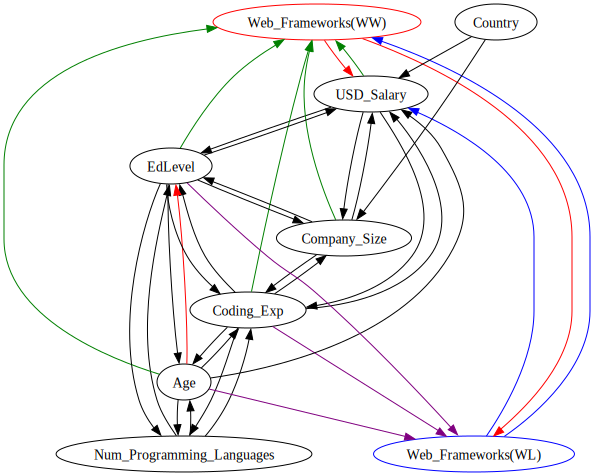

In [929]:
import graphviz as gr

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

g = gr.Digraph()

# Web_Frameworks(WW)
g.edge("Web_Frameworks(WW)", "USD_Salary", color="red")
g.edge("Web_Frameworks(WW)", "Web_Frameworks(WL)", color="red")

# Web_Frameworks(WL)
g.edge("Web_Frameworks(WL)", "Web_Frameworks(WW)", color="blue")
g.edge("Web_Frameworks(WL)", "USD_Salary", color="blue")

# Coding Exp
g.edge("Coding_Exp", "Web_Frameworks(WW)", color="green")
g.edge("Coding_Exp", "Web_Frameworks(WL)", color="purple")
g.edge("Coding_Exp", "Num_Programming_Languages")
g.edge("Coding_Exp", "Age")
g.edge("Coding_Exp", "Company_Size")
g.edge("Coding_Exp", "EdLevel")
g.edge("Coding_Exp", "USD_Salary")

# Num_Programming_Languages
g.edge("Num_Programming_Languages", "Coding_Exp")
g.edge("Num_Programming_Languages", "Age")
g.edge("Num_Programming_Languages", "EdLevel")

# Age
g.edge("Age", "Web_Frameworks(WW)", color="green")
g.edge("Age", "Web_Frameworks(WL)", color="purple")
g.edge("Age", "Coding_Exp")
g.edge("Age", "Num_Programming_Languages")
g.edge("Age", "EdLevel", color="red")
g.edge("Age", "USD_Salary")

# Company_Size
g.edge("Company_Size", "Web_Frameworks(WW)", color="green")
g.edge("Company_Size", "Coding_Exp")
g.edge("Company_Size", "EdLevel")
g.edge("Company_Size", "USD_Salary")

# edlevel
g.edge("EdLevel", "Web_Frameworks(WW)", color="green")
g.edge("EdLevel", "Web_Frameworks(WL)", color="purple")
g.edge("EdLevel", "Coding_Exp")
g.edge("EdLevel", "Num_Programming_Languages")
g.edge("EdLevel", "Age")
g.edge("EdLevel", "Company_Size")
g.edge("EdLevel", "USD_Salary")

# USD_Salary
g.edge("USD_Salary", "Web_Frameworks(WW)", color="green")
g.edge("USD_Salary", "Coding_Exp")
g.edge("USD_Salary", "Company_Size")
g.edge("USD_Salary", "EdLevel")

# Country
g.edge("Country", "Company_Size")
g.edge("Country", "USD_Salary")

g.node("Web_Frameworks(WW)", "Web_Frameworks(WW)", color="red")
g.node("Web_Frameworks(WL)", "Web_Frameworks(WL)", color="blue")

g

# Data Clean-up

In [930]:
# drop unnecessary columns
toKeepData1 = {'WebframeHaveWorkedWith', 'Country', 'ConvertedCompYearly', 'EdLevel', 'OrgSize', 'YearsCodePro', 'YearsCode', 'Age', 'WebframeWantToWorkWith', 'LanguageHaveWorkedWith'}
toKeepData2 = {'WebframeHaveWorkedWith', 'Country', 'ConvertedCompYearly', 'EdLevel', 'OrgSize', 'YearsCodePro', 'YearsCode', 'Age', 'WebframeWantToWorkWith', 'LanguageHaveWorkedWith'}
toKeepData3 = {'WebframeHaveWorkedWith', 'Country', 'ConvertedCompYearly', 'EdLevel', 'OrgSize', 'YearsCodePro', 'YearsCode', 'Age', 'WebframeWantToWorkWith', 'LanguageHaveWorkedWith'}

data3.columns = np.where(data3.columns == 'WebframeWorkedWith', 'WebframeHaveWorkedWith', data3.columns)
data3.columns = np.where(data3.columns == 'WebframeDesireNextYear', 'WebframeWantToWorkWith', data3.columns)
data3.columns = np.where(data3.columns == 'ConvertedComp', 'ConvertedCompYearly', data3.columns)
data3.columns = np.where(data3.columns == 'LanguageWorkedWith', 'LanguageHaveWorkedWith', data3.columns)

# drop all other columns
data1 = data1.drop(data1.columns.difference(toKeepData1), axis=1)
data2 = data2.drop(data2.columns.difference(toKeepData2), axis=1)
data3 = data3.drop(data3.columns.difference(toKeepData3), axis=1)

# clean up WebframeHaveWorkedWith (Target variable for the model 1)

In [931]:
# see the data contribution in 3 frameswork from 2020 to 2022
#2022
a = b = c = 0
for x in data1["WebframeHaveWorkedWith"]:
    if isinstance(x, str) and "Angular" in x:
        a = a + 1
    if isinstance(x, str) and "React" in x:
        b = b + 1
    if isinstance(x, str) and "jQuery" in x:
        c = c + 1

print(a,b,c)

#2021
a = b = c = 0
for x in data2["WebframeHaveWorkedWith"]:
    if isinstance(x, str) and "Angular" in x:
        a = a + 1
    if isinstance(x, str) and "React" in x:
        b = b + 1
    if isinstance(x, str) and "jQuery" in x:
        c = c + 1

print(a,b,c)

#2020
a = b = c = 0
for x in data3["WebframeHaveWorkedWith"]:
    if isinstance(x, str) and "Angular" in x:
        a = a + 1
    if isinstance(x, str) and "React" in x:
        b = b + 1
    if isinstance(x, str) and "jQuery" in x:
        c = c + 1

print(a,b,c)

13042 23277 15602
17259 25296 21693
13481 15167 18316


We drop every row that contains nan in WebframeHaveWorkedWith colkumn from each dataset

In [932]:
# drop na column

# clean data 2022 webframe
data1.dropna(subset=["WebframeHaveWorkedWith"], inplace=True)

# clean data 2021 webframe
data2.dropna(subset=["WebframeHaveWorkedWith"], inplace=True)

# clean data 2020 webframe
data3.dropna(subset=["WebframeHaveWorkedWith"], inplace=True)

The WebframeHaveWorkedWith column contains Angular and Angular.js, which is an older version of Angular. Angular is TypeScript language based and Angular.js is JavaScript based. Thus, to reduce bias from versions and languages among the three target frontend webframe work, we will group Angular.js to Angular.

We then split into new row by each framework if a row has multiple frameworks seperated by ; in 'WebframeHaveWorkedWith' e.g 'Angular;React.js' will be splited in to a row of 'React' and 'Angular'

We keep only the row of 'React', 'Angular', and 'jQuery'

Finally, we drop any duplicated row

In [933]:
# replace Angular.js with Angular
data1['WebframeHaveWorkedWith'] = data1['WebframeHaveWorkedWith'].str.replace('Angular.js', 'Angular')
data2['WebframeHaveWorkedWith'] = data2['WebframeHaveWorkedWith'].str.replace('Angular.js', 'Angular')
data3['WebframeHaveWorkedWith'] = data3['WebframeHaveWorkedWith'].str.replace('Angular.js', 'Angular')

# split new row by each framework if a row has multiple frameworks seperated by ;
data1['WebframeHaveWorkedWith'] = data1['WebframeHaveWorkedWith'].str.split(';')
data1 = data1.explode('WebframeHaveWorkedWith').reset_index(drop=True)

data2['WebframeHaveWorkedWith'] = data2['WebframeHaveWorkedWith'].str.split(';')
data2 = data2.explode('WebframeHaveWorkedWith').reset_index(drop=True)

data3['WebframeHaveWorkedWith'] = data3['WebframeHaveWorkedWith'].str.split(';')
data3 = data3.explode('WebframeHaveWorkedWith').reset_index(drop=True)

# remove all other rows that is not Angular, React, or jQuery
frameworks = ["jQuery", "React.js", "Angular"]
data1 = data1[data1['WebframeHaveWorkedWith'].str.contains('|'.join(frameworks))]
data2 = data2[data2['WebframeHaveWorkedWith'].str.contains('|'.join(frameworks))]
data3 = data3[data3['WebframeHaveWorkedWith'].str.contains('|'.join(frameworks))]

# remove duplicate rows e.g duplicated rows from the row that contains Angular and Angular.js
data1 = data1.drop_duplicates()
data2 = data2.drop_duplicates()
data3 = data3.drop_duplicates()

<Axes: title={'center': '2022'}, xlabel='WebframeHaveWorkedWith'>

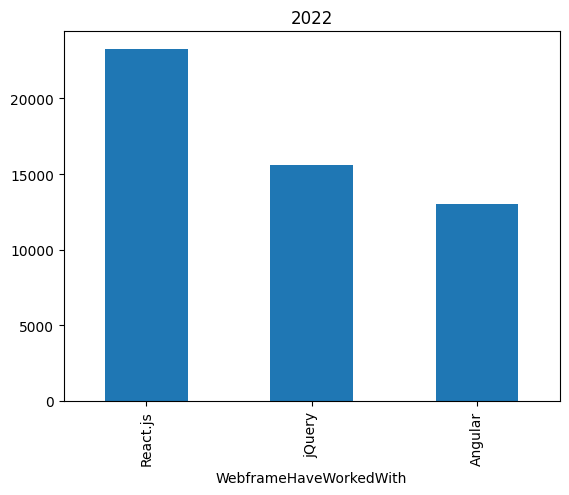

In [934]:
# plot histogram for 2022
data1['WebframeHaveWorkedWith'].value_counts().plot(kind='bar', title="2022")

<Axes: title={'center': '2021'}, xlabel='WebframeHaveWorkedWith'>

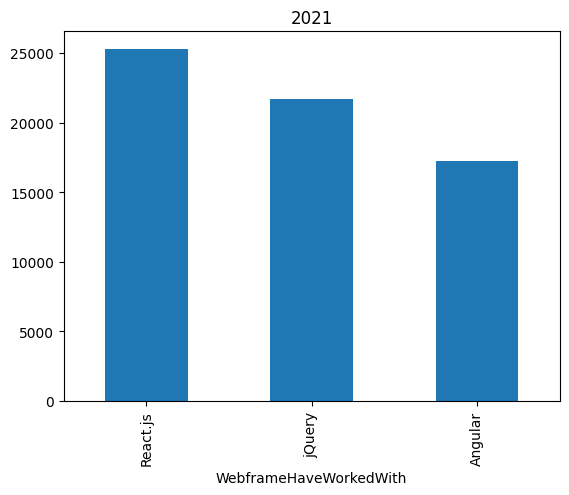

In [935]:
# plot histogram for 2021
data2['WebframeHaveWorkedWith'].value_counts().plot(kind='bar', title="2021")


<Axes: title={'center': '2020'}, xlabel='WebframeHaveWorkedWith'>

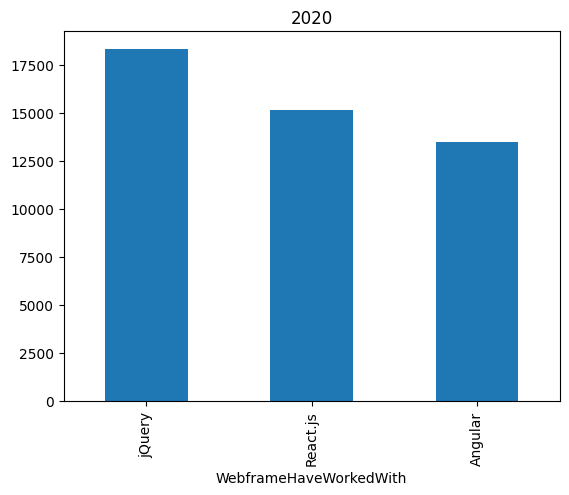

In [936]:
# plot histogram for 2020
data3['WebframeHaveWorkedWith'].value_counts().plot(kind='bar', title="2020")

# clean up WebframeWantToWorkWith (Target variable for the model 2)

In [937]:
# see the data contribution in 3 frameswork from 2020 to 2022
#2022
a = b = c = 0
for x in data1["WebframeWantToWorkWith"]:
    if isinstance(x, str) and "Angular" in x:
        a = a + 1
    if isinstance(x, str) and "React" in x:
        b = b + 1
    if isinstance(x, str) and "jQuery" in x:
        c = c + 1

print(a,b,c)

#2021
a = b = c = 0
for x in data2["WebframeWantToWorkWith"]:
    if isinstance(x, str) and "Angular" in x:
        a = a + 1
    if isinstance(x, str) and "React" in x:
        b = b + 1
    if isinstance(x, str) and "jQuery" in x:
        c = c + 1

print(a,b,c)

#2020
a = b = c = 0
for x in data3["WebframeWantToWorkWith"]:
    if isinstance(x, str) and "Angular" in x:
        a = a + 1
    if isinstance(x, str) and "React" in x:
        b = b + 1
    if isinstance(x, str) and "jQuery" in x:
        c = c + 1

print(a,b,c)

13487 28089 8659
19185 34119 12468
16433 25165 10951


We drop every row that contains nan in WebframeWantToWorkWith column from each dataset

In [938]:
# drop na column
# clean data 2022 webframe
data1.dropna(subset=["WebframeWantToWorkWith"], inplace=True)

# clean data 2021 webframe
data2.dropna(subset=["WebframeWantToWorkWith"], inplace=True)

# clean data 2020 webframe
data3.dropna(subset=["WebframeWantToWorkWith"], inplace=True)

The WebframeWantToWorkWith column contains Angular and Angular.js, which is an older version of Angular. Angular is TypeScript language based and Angular.js is JavaScript based. Thus, to reduce bias from versions and languages among the three target frontend webframe work, we will group Angular.js to Angular.

We then split into new row by each framework if a row has multiple frameworks seperated by ; in 'WebframeWantToWorkWith' e.g 'Angular;React.js' will be splited in to a row of 'React' and 'Angular'

We keep only the row of 'React', 'Angular', and 'jQuery'

Finally, we drop any duplicated row

In [939]:
# replace Angular.js with Angular
data1['WebframeWantToWorkWith'] = data1['WebframeWantToWorkWith'].str.replace('Angular.js', 'Angular')
data2['WebframeWantToWorkWith'] = data2['WebframeWantToWorkWith'].str.replace('Angular.js', 'Angular')
data3['WebframeWantToWorkWith'] = data3['WebframeWantToWorkWith'].str.replace('Angular.js', 'Angular')

# split new row by each framework if a row has multiple frameworks seperated by ;
data1['WebframeWantToWorkWith'] = data1['WebframeWantToWorkWith'].str.split(';')
data1 = data1.explode('WebframeWantToWorkWith').reset_index(drop=True)

data2['WebframeWantToWorkWith'] = data2['WebframeWantToWorkWith'].str.split(';')
data2 = data2.explode('WebframeWantToWorkWith').reset_index(drop=True)

data3['WebframeWantToWorkWith'] = data3['WebframeWantToWorkWith'].str.split(';')
data3 = data3.explode('WebframeWantToWorkWith').reset_index(drop=True)

# remove all other rows that is not Angular, React, or jQuery
frameworks = ["jQuery", "React.js", "Angular"]
data1 = data1[data1['WebframeWantToWorkWith'].str.contains('|'.join(frameworks))]
data2 = data2[data2['WebframeWantToWorkWith'].str.contains('|'.join(frameworks))]
data3 = data3[data3['WebframeWantToWorkWith'].str.contains('|'.join(frameworks))]

# remove duplicate rows e.g duplicated rows from the row that contains Angular and Angular.js
data1 = data1.drop_duplicates()
data2 = data2.drop_duplicates()
data3 = data3.drop_duplicates()

<Axes: title={'center': '2022'}, xlabel='WebframeWantToWorkWith'>

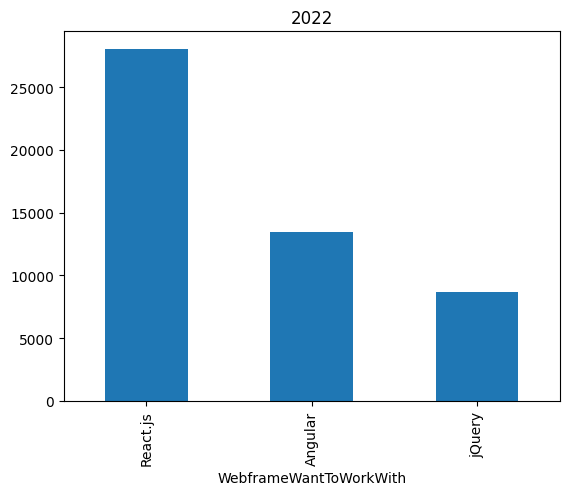

In [940]:
# plot histogram for 2022
data1['WebframeWantToWorkWith'].value_counts().plot(kind='bar', title="2022")

<Axes: title={'center': '2021'}, xlabel='WebframeWantToWorkWith'>

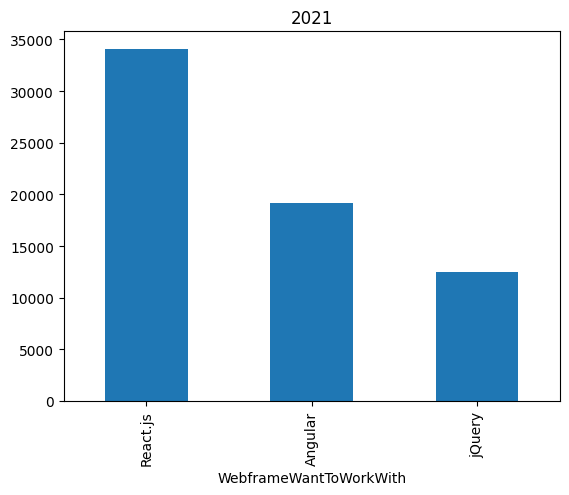

In [941]:
# plot histogram for 2021
data2['WebframeWantToWorkWith'].value_counts().plot(kind='bar', title="2021")

<Axes: title={'center': '2020'}, xlabel='WebframeWantToWorkWith'>

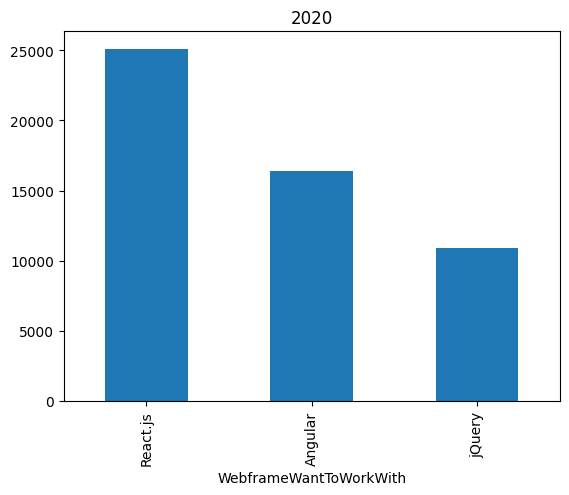

In [942]:
# plot histogram for 2020
data3['WebframeWantToWorkWith'].value_counts().plot(kind='bar', title="2020")

DATA CLEANING - OrgSize

In [943]:
# remove all nan, idk, and other undefined rows
data2['OrgSize'].unique()

# remove all nan and 'I don’t know'
data1 = data1.dropna()
data1 = data1[data1['OrgSize'] != 'I don’t know']

data2 = data2.dropna()
data2 = data2[data2['OrgSize'] != 'I don’t know']

data3 = data3.dropna()
data3 = data3[data3['OrgSize'] != 'I don’t know']

We can transform data from object string into a number representation grouped into 9 bins

In [944]:
# divide the data into 9 bins

# 2022
data1['OrgSize'].replace("10,000 or more employees", 5, inplace=True)
data1['OrgSize'].replace("5,000 to 9,999 employees", 4, inplace=True)
data1['OrgSize'].replace("1,000 to 4,999 employees", 4, inplace=True)
data1['OrgSize'].replace("500 to 999 employees", 3, inplace=True)
data1['OrgSize'].replace("100 to 499 employees", 3, inplace=True)
data1['OrgSize'].replace("20 to 99 employees", 2, inplace=True)
data1['OrgSize'].replace("10 to 19 employees", 2, inplace=True)
data1['OrgSize'].replace("2 to 9 employees", 1, inplace=True)
data1['OrgSize'].replace("Just me - I am a freelancer, sole proprietor, etc.", 1, inplace=True)

# 2021
data2['OrgSize'].replace("10,000 or more employees", 5, inplace=True)
data2['OrgSize'].replace("5,000 to 9,999 employees", 4, inplace=True)
data2['OrgSize'].replace("1,000 to 4,999 employees", 4, inplace=True)
data2['OrgSize'].replace("500 to 999 employees", 3, inplace=True)
data2['OrgSize'].replace("100 to 499 employees", 3, inplace=True)
data2['OrgSize'].replace("20 to 99 employees", 2, inplace=True)
data2['OrgSize'].replace("10 to 19 employees", 2, inplace=True)
data2['OrgSize'].replace("2 to 9 employees", 1, inplace=True)
data2['OrgSize'].replace("Just me - I am a freelancer, sole proprietor, etc.", 1, inplace=True)

# 2020
data3['OrgSize'].replace("10,000 or more employees", 5, inplace=True)
data3['OrgSize'].replace("5,000 to 9,999 employees", 4, inplace=True)
data3['OrgSize'].replace("1,000 to 4,999 employees", 4, inplace=True)
data3['OrgSize'].replace("500 to 999 employees", 3, inplace=True)
data3['OrgSize'].replace("100 to 499 employees", 3, inplace=True)
data3['OrgSize'].replace("20 to 99 employees", 2, inplace=True)
data3['OrgSize'].replace("10 to 19 employees", 2, inplace=True)
data3['OrgSize'].replace("2 to 9 employees", 1, inplace=True)
data3['OrgSize'].replace("Just me - I am a freelancer, sole proprietor, etc.", 1, inplace=True)


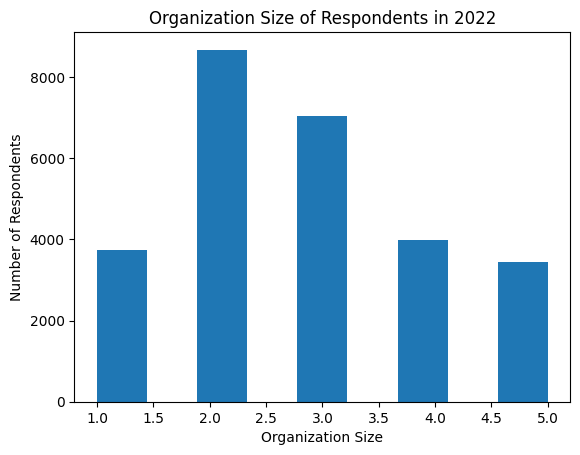

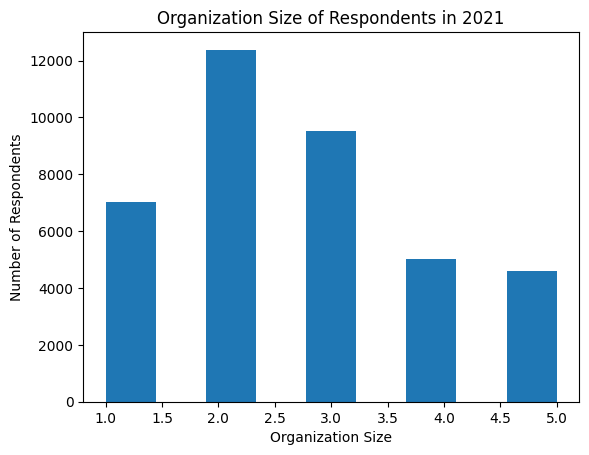

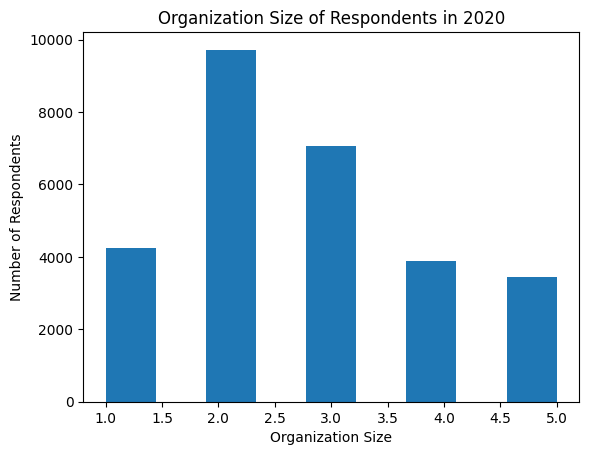

In [945]:
# plot the data histogram
# 2022
plt.hist(data1['OrgSize'], bins=9)
plt.xlabel('Organization Size')
plt.ylabel('Number of Respondents')
plt.title('Organization Size of Respondents in 2022')
plt.show()

# 2021
plt.hist(data2['OrgSize'], bins=9)
plt.xlabel('Organization Size')
plt.ylabel('Number of Respondents')
plt.title('Organization Size of Respondents in 2021')
plt.show()

# 2020
plt.hist(data3['OrgSize'], bins=9)
plt.xlabel('Organization Size')
plt.ylabel('Number of Respondents')
plt.title('Organization Size of Respondents in 2020')
plt.show()

### Salary cleaning
PC Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working months and 50 working weeks.

Usage: We assume that the salary of a developer may varies based on the type of WorkedWith frameworks

In [946]:
# PC
#clean data salary column and divide in to 5 groups based on the salary
# remove all NA of convertedComp from data 2020 inplace
data3.dropna(subset=['ConvertedCompYearly'], inplace=True)
data3 = data3[data3['ConvertedCompYearly'] != 0]

# remove all NA and 0 of convertedComp from data 2021
data2.dropna(subset=['ConvertedCompYearly'], inplace=True)
data2 = data2[data2['ConvertedCompYearly'] != 0]

# remove all NA and 0 of convertedComp from data 2022
data1.dropna(subset=['ConvertedCompYearly'], inplace=True)
data1 = data1[data1['ConvertedCompYearly'] != 0]

data3['ConvertedCompYearly'].info()


<class 'pandas.core.series.Series'>
Index: 28257 entries, 2 to 134728
Series name: ConvertedCompYearly
Non-Null Count  Dtype  
--------------  -----  
28257 non-null  float64
dtypes: float64(1)
memory usage: 441.5 KB


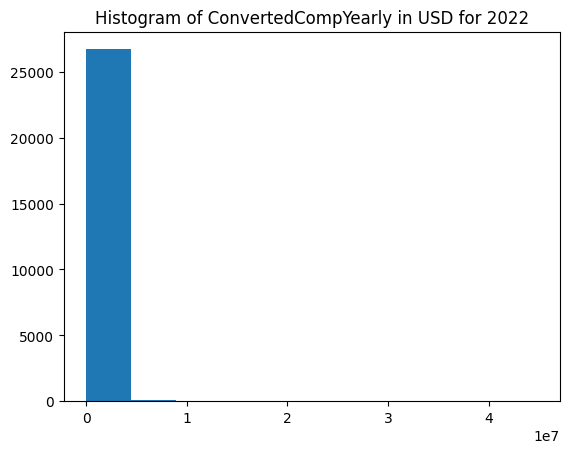

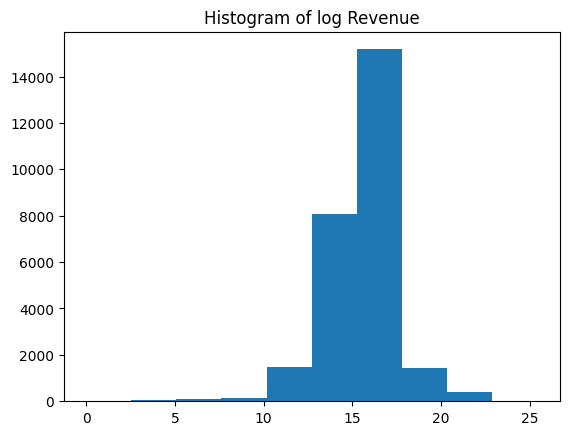

In [947]:
# import plt
import matplotlib.pyplot as plt

# plot histogram for 2022
plt.hist(data1["ConvertedCompYearly"])
plt.title('Histogram of ConvertedCompYearly in USD for 2022')
plt.show()

plt.hist(np.log2(data1['ConvertedCompYearly']))
plt.title('Histogram of log Revenue')
plt.show()



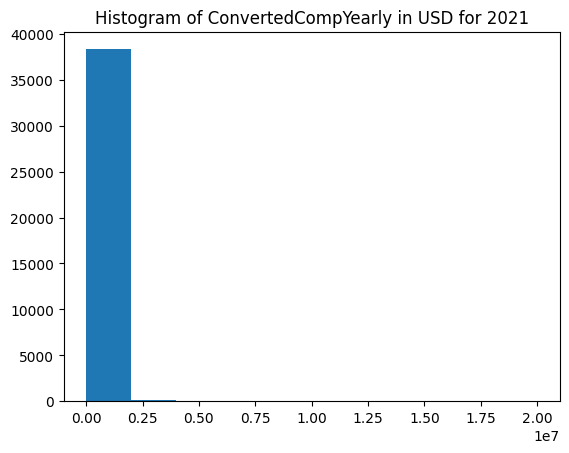

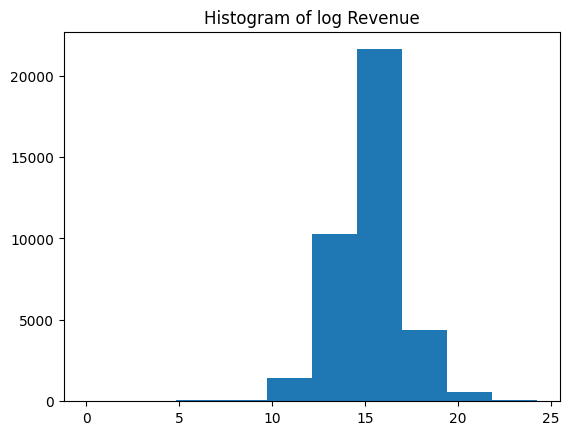

In [948]:
# plot histogram for 2021
plt.hist(data2["ConvertedCompYearly"])
plt.title('Histogram of ConvertedCompYearly in USD for 2021')
plt.show()

plt.hist(np.log2(data2['ConvertedCompYearly']))
plt.title('Histogram of log Revenue')
plt.show()

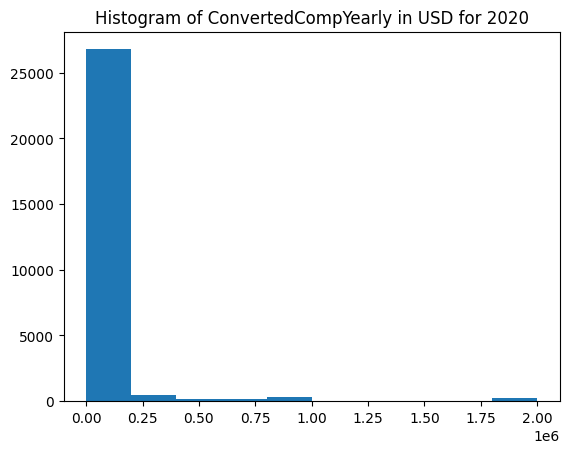

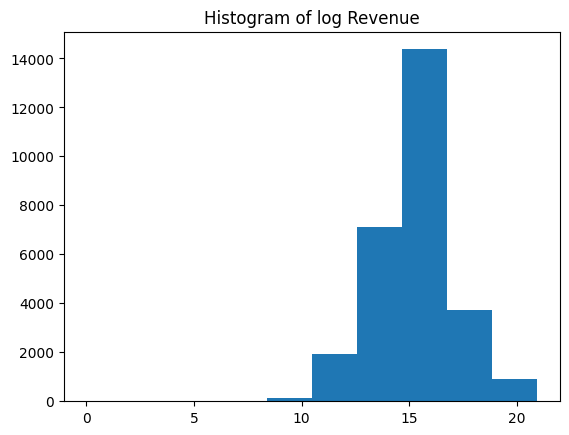

In [949]:
# plot histogram for 2020
plt.hist(data3["ConvertedCompYearly"])
plt.title('Histogram of ConvertedCompYearly in USD for 2020')
plt.show()

plt.hist(np.log2(data3['ConvertedCompYearly']))
plt.title('Histogram of log Revenue')
plt.show()

# education level

Usage: We assume that the developers from different education level may have different preference or experience on different web frameworks

In [950]:
# PC
# clean up all null values in the data of edLevel
data1.dropna(subset=['EdLevel'], inplace=True)
data2.dropna(subset=['EdLevel'], inplace=True)
data3.dropna(subset=['EdLevel'], inplace=True)

# clean up 2022 data
data1['EdLevel'] = data1['EdLevel'].str.split('\(').str[0]
data2['EdLevel'] = data2['EdLevel'].str.split('\(').str[0]
data3['EdLevel'] = data3['EdLevel'].str.split('\(').str[0]

# remove something else from the data
data1 = data1[data1['EdLevel'] != 'Something else']
data2 = data2[data2['EdLevel'] != 'Something else']
data3 = data3[data3['EdLevel'] != 'Something else']

# remvoe 'I never completed any formal education' from data3
data3 = data3[data3['EdLevel'] != 'I never completed any formal education']


In [951]:
print(data1['EdLevel'].value_counts())

EdLevel
Bachelor’s degree                                         13537
Master’s degree                                            6202
Some college/university study without earning a degree     3390
Secondary school                                           1365
Associate degree                                           1045
Professional degree                                         518
Other doctoral degree                                       364
Primary/elementary school                                   158
Name: count, dtype: int64


In [952]:
print(data2['EdLevel'].value_counts())

EdLevel
Bachelor’s degree                                         20155
Master’s degree                                            8453
Some college/university study without earning a degree     4916
Secondary school                                           1763
Associate degree                                           1307
Professional degree                                         721
Other doctoral degree                                       585
Primary/elementary school                                   208
Name: count, dtype: int64


In [953]:
print(data3['EdLevel'].value_counts())

EdLevel
Bachelor’s degree                                         15187
Master’s degree                                            5867
Some college/university study without earning a degree     3733
Secondary school                                           1335
Associate degree                                           1098
Professional degree                                         468
Other doctoral degree                                       299
Primary/elementary school                                   139
Name: count, dtype: int64


# LEVEL OF EXPERIENCE DATA CLEANING
We determine level of expreience from total year of coding (YearCode) and professional year of coding as a part of job (YearsCodePro)
 

In [954]:
# drop row if both YearsCode and YearsCodePro are nan
data1.dropna(subset=['YearsCode', 'YearsCodePro'], how='all', inplace=True)
data2.dropna(subset=['YearsCode', 'YearsCodePro'], how='all', inplace=True)
data3.dropna(subset=['YearsCode', 'YearsCodePro'], how='all', inplace=True)

# YearCode cleanup
# replace less than 1 year with 0
data1['YearsCode'] = data1['YearsCode'].replace('Less than 1 year', '0')
data2['YearsCode'] = data2['YearsCode'].replace('Less than 1 year', '0')
data3['YearsCode'] = data3['YearsCode'].replace('Less than 1 year', '0')

# replace more than 50 years with 51
data1['YearsCode'] = data1['YearsCode'].replace('More than 50 years', '51')
data2['YearsCode'] = data2['YearsCode'].replace('More than 50 years', '51')
data3['YearsCode'] = data3['YearsCode'].replace('More than 50 years', '51')

# drop row if YearsCode is nan
data1.dropna(subset=['YearsCode'], inplace=True)
data2.dropna(subset=['YearsCode'], inplace=True)
data3.dropna(subset=['YearsCode'], inplace=True)

In [955]:
# YearCodePro cleanup
# replace less than 1 year with 0
data1['YearsCodePro'] = data1['YearsCodePro'].replace('Less than 1 year', '0')
data2['YearsCodePro'] = data2['YearsCodePro'].replace('Less than 1 year', '0')
data3['YearsCodePro'] = data3['YearsCodePro'].replace('Less than 1 year', '0')

# replace more than 50 years with 51
data1['YearsCodePro'] = data1['YearsCodePro'].replace('More than 50 years', '51')
data2['YearsCodePro'] = data2['YearsCodePro'].replace('More than 50 years', '51')
data3['YearsCodePro'] = data3['YearsCodePro'].replace('More than 50 years', '51')

# impute nan with 0
data1['YearsCodePro'] = data1['YearsCodePro'].fillna('0')
data2['YearsCodePro'] = data2['YearsCodePro'].fillna('0')
data3['YearsCodePro'] = data3['YearsCodePro'].fillna('0')

In [956]:
# convvert from object string to integer
data1['YearsCode'] = data1['YearsCode'].astype(int)
data2['YearsCode'] = data2['YearsCode'].astype(int)
data3['YearsCode'] = data3['YearsCode'].astype(int)

data1['YearsCodePro'] = data1['YearsCodePro'].astype(int)
data2['YearsCodePro'] = data2['YearsCodePro'].astype(int)
data3['YearsCodePro'] = data3['YearsCodePro'].astype(int)  

# Country data Clean up

In [957]:
# remove all NA of County inplace
data1.dropna(subset=['Country'], inplace=True)
data2.dropna(subset=['Country'], inplace=True)
data3.dropna(subset=['Country'], inplace=True)

# modify text in the column
data1["Country"] = data1["Country"].replace({"United States of America": "United States"})
data2["Country"] = data2["Country"].replace({"United States of America": "United States"})

data1["Country"] = data1["Country"].replace({"United Kingdom of Great Britain and Northern Ireland": "United Kingdom"})
data2["Country"] = data2["Country"].replace({"United Kingdom of Great Britain and Northern Ireland": "United Kingdom"})

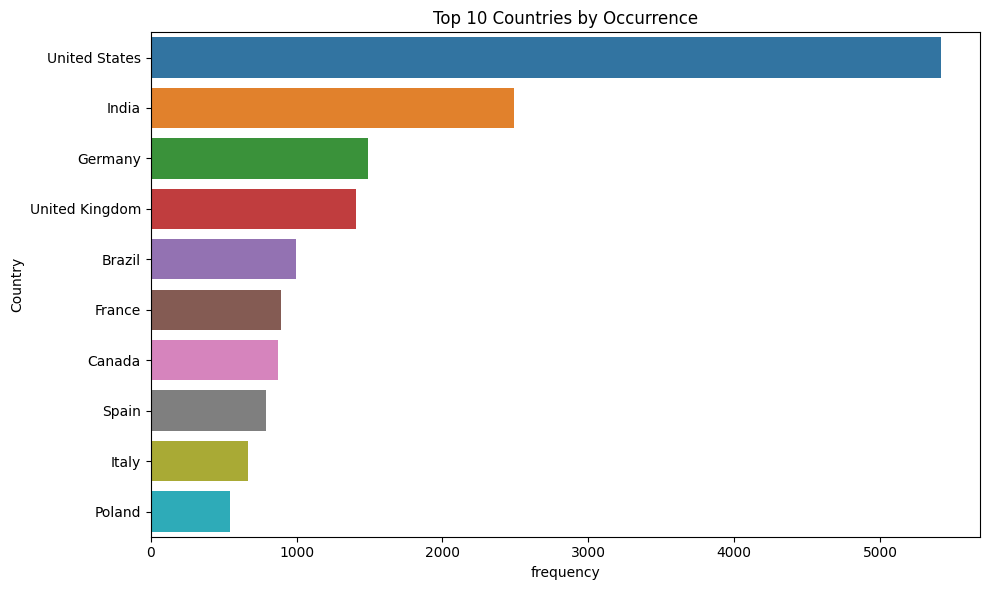

In [958]:
# Calculate the top 10 countries and their occurrence counts in 2022
top_ten_countries = data1['Country'].value_counts().head(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_ten_countries.values, y=top_ten_countries.index)
plt.xlabel('frequency')
plt.ylabel('Country')
plt.title('Top 10 Countries by Occurrence')
plt.tight_layout()
plt.show()

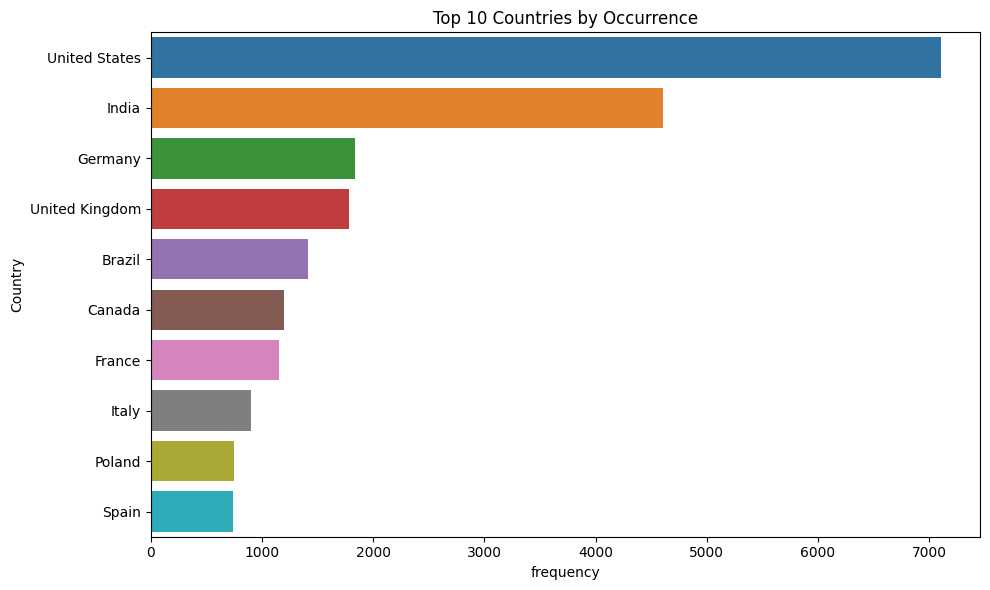

In [959]:
# Calculate the top 10 countries and their occurrence counts in 2021
top_ten_countries = data2['Country'].value_counts().head(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_ten_countries.values, y=top_ten_countries.index)
plt.xlabel('frequency')
plt.ylabel('Country')
plt.title('Top 10 Countries by Occurrence')
plt.tight_layout()
plt.show()


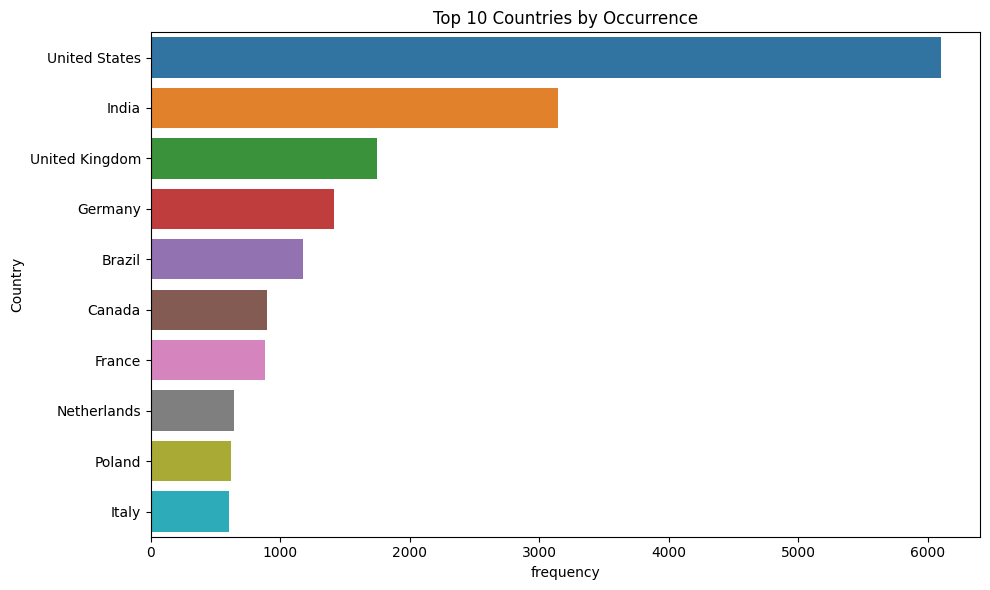

In [960]:
# Calculate the top 10 countries and their occurrence counts in 2020
top_ten_countries = data3['Country'].value_counts().head(10)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_ten_countries.values, y=top_ten_countries.index)
plt.xlabel('frequency')
plt.ylabel('Country')
plt.title('Top 10 Countries by Occurrence')
plt.tight_layout()
plt.show()

In [961]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26579 entries, 0 to 181791
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   EdLevel                 26579 non-null  object 
 1   YearsCode               26579 non-null  int32  
 2   YearsCodePro            26579 non-null  int32  
 3   OrgSize                 26579 non-null  int64  
 4   Country                 26579 non-null  object 
 5   LanguageHaveWorkedWith  26579 non-null  object 
 6   WebframeHaveWorkedWith  26579 non-null  object 
 7   WebframeWantToWorkWith  26579 non-null  object 
 8   Age                     26579 non-null  object 
 9   ConvertedCompYearly     26579 non-null  float64
dtypes: float64(1), int32(2), int64(1), object(6)
memory usage: 2.0+ MB


# Age data Clean up

The age dataSet from 3 different datasets are given into a slightly different formats. First, we need to drop all undefined ages. Then we bin them into 6 diferent groups.

In [962]:
# remove all NA of County inplace
data1.dropna(subset=['Age'], inplace=True)
data2.dropna(subset=['Age'], inplace=True)
data3.dropna(subset=['Age'], inplace=True)

# remove 'prefer not to say'
data1 = data1[data1.Age != "Prefer not to say"]
data2 = data2[data2.Age != "Prefer not to say"]

# 2022
data1["Age"].replace({"65 years or older": 7}, inplace=True)
data1["Age"].replace({"55-64 years old": 6}, inplace=True)
data1["Age"].replace({"45-54 years old": 5}, inplace=True)
data1["Age"].replace({"35-44 years old": 4}, inplace=True)
data1["Age"].replace({"25-34 years old": 3}, inplace=True)
data1["Age"].replace({"18-24 years old": 2}, inplace=True)
data1["Age"].replace({"Under 18 years old": 1}, inplace=True)

# 2021
data2["Age"].replace({"65 years or older": 7}, inplace=True)
data2["Age"].replace({"55-64 years old": 6}, inplace=True)
data2["Age"].replace({"45-54 years old": 5}, inplace=True)
data2["Age"].replace({"35-44 years old": 4}, inplace=True)
data2["Age"].replace({"25-34 years old": 3}, inplace=True)
data2["Age"].replace({"18-24 years old": 2}, inplace=True)
data2["Age"].replace({"Under 18 years old": 1}, inplace=True)

# 2020
# Create bins using pandas cut() function
bins = [0, 18, 24, 34, 44, 54, 64, 100]
labels = [1, 2, 3, 4, 5, 6, 7]
data3['Age'] = pd.cut(data3['Age'], bins=bins, labels=labels)

print(data1['Age'].value_counts())

Age
3    13971
4     6133
2     4015
5     1853
6      479
7       59
1       36
Name: count, dtype: int64


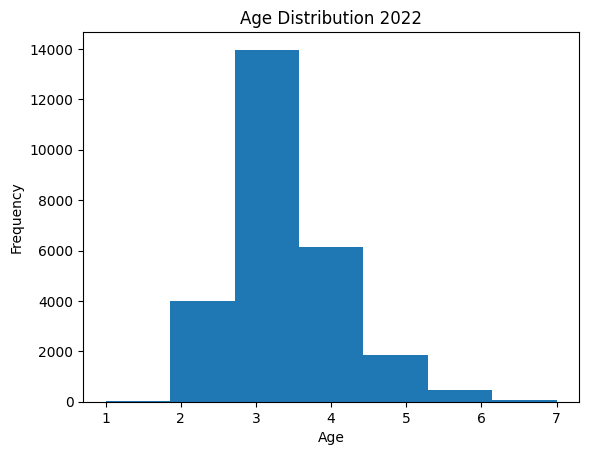

In [963]:
# plot histogram of Age 2022
plt.hist(data1['Age'], bins=7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution 2022')
plt.show()



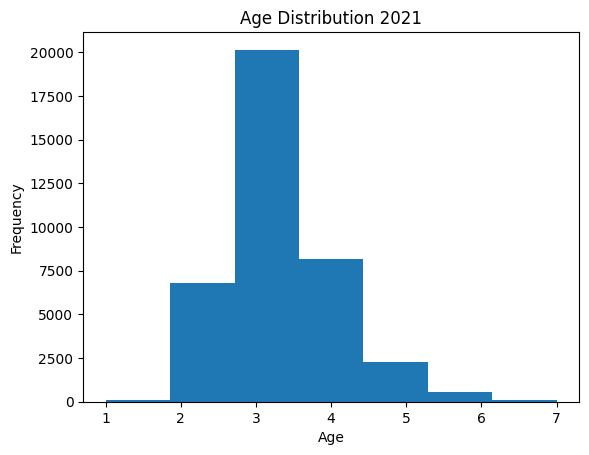

In [964]:
# plot histogram of Age 2021
plt.hist(data2['Age'], bins=7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution 2021')
plt.show()

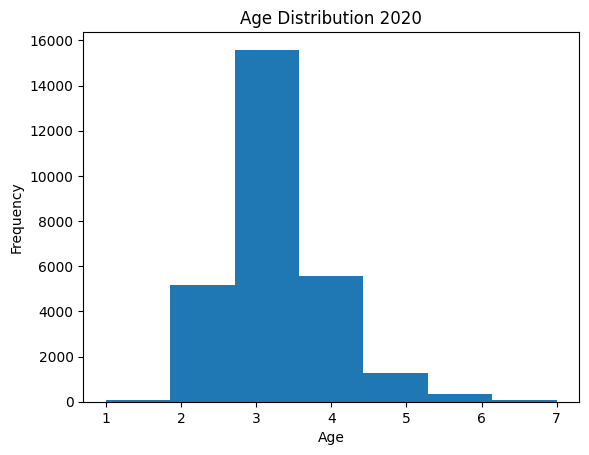

In [965]:
# plot histogram of Age 2020
plt.hist(data3['Age'], bins=7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution 2020')
plt.show()

# number of programming languages

In [966]:
# remove all NA of LanguageWorkedWith inplace
data1.dropna(subset=['LanguageHaveWorkedWith'], inplace=True)
data2.dropna(subset=['LanguageHaveWorkedWith'], inplace=True)
data3.dropna(subset=['LanguageHaveWorkedWith'], inplace=True)

# Number of Languages
data1['num_languages'] = data1['LanguageHaveWorkedWith'].apply(lambda x: len(x.split(";")))
data2['num_languages'] = data2['LanguageHaveWorkedWith'].apply(lambda x: len(x.split(";")))
data3['num_languages'] = data3['LanguageHaveWorkedWith'].apply(lambda x: len(x.split(";")))

In [967]:
# Drop the column "LanguageHaveWorkedWith"
data1.drop('LanguageHaveWorkedWith', axis=1, inplace=True)
data2.drop('LanguageHaveWorkedWith', axis=1, inplace=True)
data3.drop('LanguageHaveWorkedWith', axis=1, inplace=True)

In [968]:
data1.head(10)

,EdLevel,YearsCode,YearsCodePro,OrgSize,Country,WebframeHaveWorkedWith,WebframeWantToWorkWith,Age,ConvertedCompYearly,num_languages
0,Master’s degree,14,5,2,United Kingdom,Angular,Angular,3,40205.0,5
32,Bachelor’s degree,12,5,1,United States,React.js,React.js,3,65000.0,6
43,Master’s degree,11,5,4,United States,jQuery,React.js,3,110000.0,7
48,Bachelor’s degree,7,4,1,Czech Republic,Angular,Angular,3,19224.0,5
52,Bachelor’s degree,7,4,1,Czech Republic,Angular,React.js,3,19224.0,5
55,Bachelor’s degree,7,4,1,Czech Republic,React.js,Angular,3,19224.0,5
59,Bachelor’s degree,7,4,1,Czech Republic,React.js,React.js,3,19224.0,5
68,Bachelor’s degree,10,5,2,United States,jQuery,jQuery,3,106960.0,6
69,Bachelor’s degree,10,5,2,United States,jQuery,React.js,3,106960.0,6
98,Master’s degree,4,3,3,Madagascar,React.js,React.js,3,5124.0,2


In [969]:
data2.head(10)

,Country,EdLevel,YearsCode,YearsCodePro,OrgSize,WebframeHaveWorkedWith,WebframeWantToWorkWith,Age,ConvertedCompYearly,num_languages
18,Turkey,Bachelor’s degree,6,2,3,Angular,Angular,3,17748.0,5
21,Canada,Bachelor’s degree,9,6,3,jQuery,jQuery,3,46135.0,6
30,Germany,Master’s degree,26,18,4,Angular,Angular,4,77831.0,7
46,Brazil,Bachelor’s degree,22,15,1,React.js,React.js,4,60480.0,6
49,Greece,Bachelor’s degree,12,6,2,Angular,Angular,3,25944.0,7
52,Greece,Bachelor’s degree,12,6,2,Angular,React.js,3,25944.0,7
71,United Kingdom,Bachelor’s degree,24,18,4,React.js,React.js,4,129266.0,4
89,United States,Bachelor’s degree,25,15,3,jQuery,React.js,5,105000.0,3
90,United States,Bachelor’s degree,25,15,3,React.js,React.js,5,105000.0,3
102,Hungary,Master’s degree,25,6,1,Angular,Angular,3,42336.0,7


In [970]:
data3.head(10)

,Age,ConvertedCompYearly,Country,EdLevel,OrgSize,WebframeWantToWorkWith,WebframeHaveWorkedWith,YearsCode,YearsCodePro,num_languages
2,2,32315.0,United Kingdom,Master’s degree,1,jQuery,jQuery,8,4,5
3,2,40070.0,United Kingdom,Bachelor’s degree,5,Angular,Angular,10,2,3
5,2,40070.0,United Kingdom,Bachelor’s degree,5,React.js,Angular,10,2,3
6,2,40070.0,United Kingdom,Bachelor’s degree,5,Angular,React.js,10,2,3
8,2,40070.0,United Kingdom,Bachelor’s degree,5,React.js,React.js,10,2,3
10,5,14268.0,Spain,Some college/university study without earning ...,1,jQuery,jQuery,7,7,2
11,3,66000.0,United States,Associate degree,3,Angular,Angular,5,1,4
15,3,79000.0,United States,Bachelor’s degree,2,React.js,jQuery,7,3,6
19,3,79000.0,United States,Bachelor’s degree,2,React.js,React.js,7,3,6
23,2,83400.0,United States,Bachelor’s degree,5,React.js,Angular,9,3,6


# Data Vitualization and Analysis

In [971]:
# combine dataset with a yearOfSurvey column
data1['yearOfSurvey'] = 2022
data2['yearOfSurvey'] = 2021
data3['yearOfSurvey'] = 2020

# combine dataset
data = pd.concat([data1, data2, data3], ignore_index=True)

# open the file
data.to_csv('data.csv', index=False)

# Put data analysis and visualization here

In [972]:
# Put data analysis and visualization here
# Percentage of React.js, Angular and jQuery from combined data set
print(data['WebframeHaveWorkedWith'].value_counts() * 100 / len(data))

# percentage of WebframeHaveWorkedWith React.js, Angular and jQuery in each year
print(data[data['yearOfSurvey'] == 2022]['WebframeHaveWorkedWith'].value_counts() * 100 / len(data[data['yearOfSurvey'] == 2022]))
print(data[data['yearOfSurvey'] == 2022]['WebframeHaveWorkedWith'].value_counts() * 100 / len(data[data['yearOfSurvey'] == 2021]))
print(data[data['yearOfSurvey'] == 2022]['WebframeHaveWorkedWith'].value_counts() * 100 / len(data[data['yearOfSurvey'] == 2020]))


WebframeHaveWorkedWith
React.js    36.460187
jQuery      33.752763
Angular     29.787051
Name: count, dtype: float64
WebframeHaveWorkedWith
React.js    41.987493
jQuery      29.428162
Angular     28.584344
Name: count, dtype: float64
WebframeHaveWorkedWith
React.js    29.275339
jQuery      20.518478
Angular     19.930134
Name: count, dtype: float64
WebframeHaveWorkedWith
React.js    39.628813
jQuery      27.775012
Angular     26.978596
Name: count, dtype: float64


In [973]:
# number of Age and WebframeHaveWorkedWith for each year
print(data[data['yearOfSurvey'] == 2022].groupby('Age')['WebframeHaveWorkedWith'].value_counts())

data[data['yearOfSurvey'] == 2021].groupby('Age')['WebframeHaveWorkedWith'].value_counts()
data[data['yearOfSurvey'] == 2020].groupby('Age')['WebframeHaveWorkedWith'].value_counts()

print(data['Age'].value_counts())

Age  WebframeHaveWorkedWith
1    React.js                    22
     jQuery                      12
     Angular                      2
2    React.js                  1889
     jQuery                    1119
     Angular                   1007
3    React.js                  6081
     Angular                   4116
     jQuery                    3774
4    React.js                  2396
     jQuery                    1927
     Angular                   1810
5    jQuery                     730
     React.js                   605
     Angular                    518
6    jQuery                     220
     React.js                   136
     Angular                    123
7    jQuery                      30
     React.js                    17
     Angular                     12
Name: count, dtype: int64
Age
3    49697
4    19874
2    15979
5     5402
6     1390
1      206
7      197
Name: count, dtype: int64


In [974]:
# number of language and WebframeHaveWorkedWith for each
data[data['yearOfSurvey'] == 2022].groupby('num_languages')['WebframeHaveWorkedWith'].value_counts()
data[data['yearOfSurvey'] == 2021].groupby('num_languages')['WebframeHaveWorkedWith'].value_counts()
data[data['yearOfSurvey'] == 2020].groupby('num_languages')['WebframeHaveWorkedWith'].value_counts()

num_languages  WebframeHaveWorkedWith
1              React.js                  109
               Angular                    56
               jQuery                     41
2              React.js                  500
               jQuery                    307
                                        ... 
22             React.js                    4
               jQuery                      3
24             Angular                     1
               React.js                    1
               jQuery                      1
Name: count, Length: 63, dtype: int64

In [975]:
print(data['num_languages'].value_counts())

num_languages
5     16643
6     14592
4     14155
7     10544
3      8520
8      7945
9      5412
10     3504
2      3395
11     2429
12     1549
13     1026
1       950
14      742
15      421
16      258
17      190
18      149
19       81
20       49
21       46
22       41
38       36
24       14
27       14
25       12
40        9
42        9
26        4
23        3
29        2
33        1
Name: count, dtype: int64


# Do Not put data analysis and visualization after this block

In [976]:
# transfrom string into int by ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

# Fit and transform the 'WebframeHaveWorkedWith' column
data['WebframeHaveWorkedWith_Encoded'] = encoder.fit_transform(data[['WebframeHaveWorkedWith']])

# Fit and transform the 'WebframeWantWorkWith' column
data['WebframeWantToWorkWith_Encoded'] = encoder.fit_transform(data[['WebframeWantToWorkWith']])

# Fit and transform the 'Country' column
data['Country_Encoded'] = encoder.fit_transform(data[['Country']])

# Fit and transform the 'EdLevel' column
data['EdLevel_Encoded'] = encoder.fit_transform(data[['EdLevel']])

In [977]:
# Drop the column "WebframeHaveWorkedWith"
data.drop('WebframeHaveWorkedWith', axis=1, inplace=True)

# Drop the column "WebframeWantWorkWith"
data.drop('WebframeWantToWorkWith', axis=1, inplace=True)

# Drop the column "Country"
data.drop('Country', axis=1, inplace=True)

# Drop the column "EdLevel"
data.drop('EdLevel', axis=1, inplace=True)

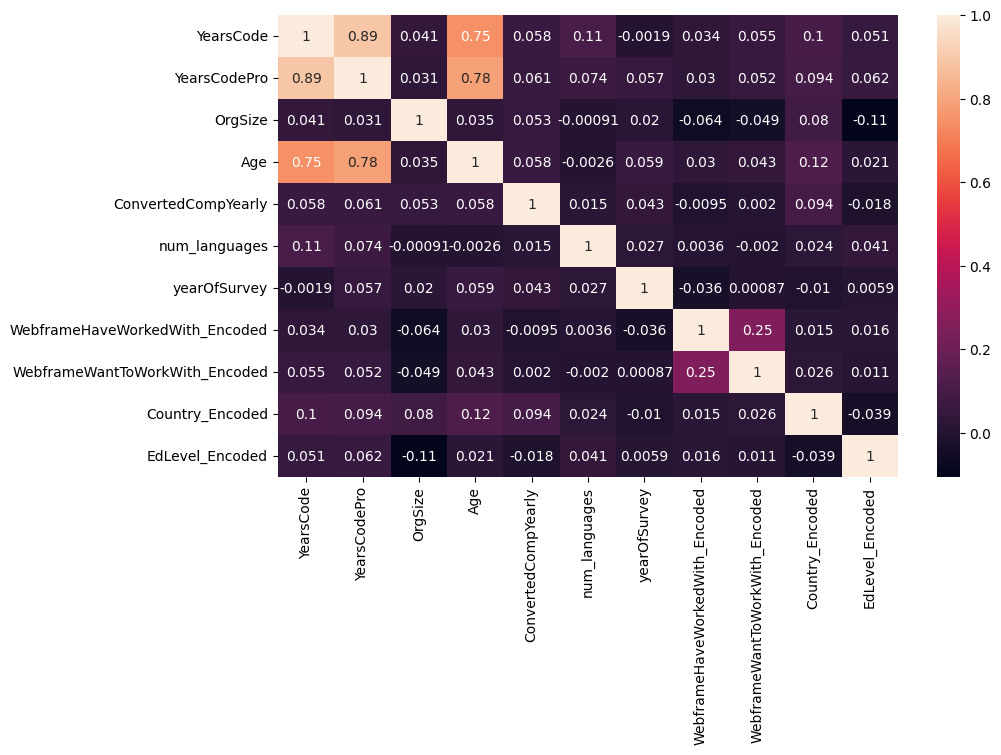

In [978]:
# plot correlation matrix
corr = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True)
plt.show()

# Model Selection (for WebframeHaveWorkedWith)

## Create Test and Train Set

Split training and testing sets into training set of WebframeHaveWorkedWith (train_set_ww) and testing set of WebframeHaveWorkedWith (testing_set_ww) 

In [979]:
# import train_test_split
from sklearn.model_selection import train_test_split

train_set_ww, test_set_ww = train_test_split(data, test_size=0.2, stratify=data["WebframeWantToWorkWith_Encoded"], random_state=42)
print(train_set_ww.shape, test_set_ww.shape)

(74196, 11) (18549, 11)


We can drop the WebframeHaveWorkedWith_Encoded column now that we’ve used it for stratified sampling.

In [980]:
test_set_ww.drop("WebframeWantToWorkWith_Encoded", axis=1, inplace=True)
train_set_ww.drop("WebframeWantToWorkWith_Encoded", axis=1, inplace=True)
train_set_ww.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74196 entries, 3365 to 90141
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   YearsCode                       74196 non-null  int32  
 1   YearsCodePro                    74196 non-null  int32  
 2   OrgSize                         74196 non-null  int64  
 3   Age                             74196 non-null  int64  
 4   ConvertedCompYearly             74196 non-null  float64
 5   num_languages                   74196 non-null  int64  
 6   yearOfSurvey                    74196 non-null  int64  
 7   WebframeHaveWorkedWith_Encoded  74196 non-null  float64
 8   Country_Encoded                 74196 non-null  float64
 9   EdLevel_Encoded                 74196 non-null  float64
dtypes: float64(4), int32(2), int64(4)
memory usage: 5.7 MB


Put the test set aside and only explore the training set.

In [981]:
train_WorkedWith = train_set_ww.copy()
test_WorkedWith = test_set_ww.copy()

<Axes: >

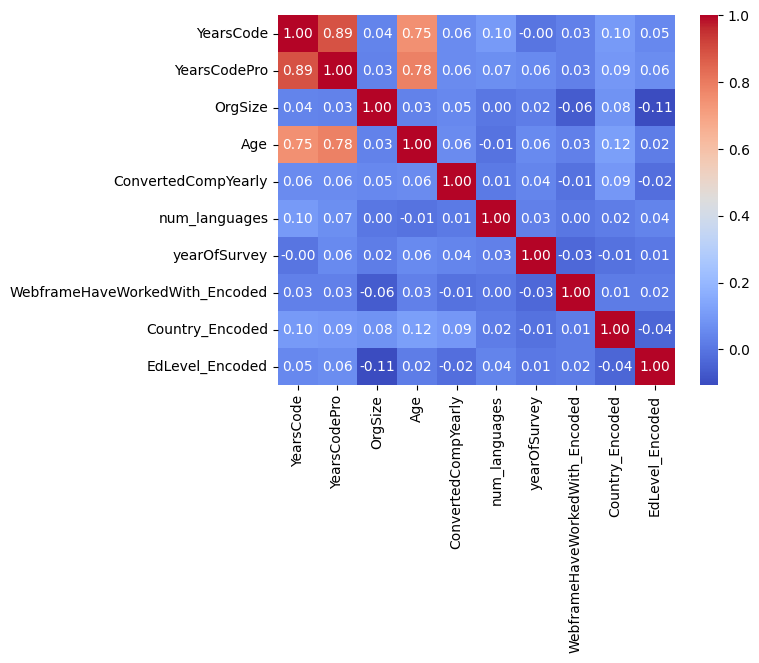

In [982]:
# PC TODO: the plot doesnt make much sense?
num_movies = train_WorkedWith.select_dtypes(include=[np.number])
corr = num_movies.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

##  Create Pipeline

In [983]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

num_attribs = ["YearsCode",
"YearsCodePro",
"OrgSize",
"Age",
"ConvertedCompYearly",
"num_languages"]

cat_attribs = ["yearOfSurvey",
"Country_Encoded",
"EdLevel_Encoded"]

log_attribs = ["ConvertedCompYearly"]

log_transform = FunctionTransformer(func=np.log2, feature_names_out="one-to-one", inverse_func=np.exp2)

num_pipeline = make_pipeline(StandardScaler())

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

log_pipeline = make_pipeline(log_transform, StandardScaler())

preprocessing = ColumnTransformer([
    ("log", log_pipeline, log_attribs),
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs)
], remainder='passthrough')


## Select Models

In [984]:
X_train = train_set_ww.drop(["WebframeHaveWorkedWith_Encoded"], axis=1)
y_train = train_set_ww["WebframeHaveWorkedWith_Encoded"]

X_test = test_set_ww.drop(["WebframeHaveWorkedWith_Encoded"], axis=1)
y_test = test_set_ww["WebframeHaveWorkedWith_Encoded"]

### Decision Tree

In [985]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

tree_model = Pipeline([
    ('preprocessing', preprocessing),
    ('decision_tree', DecisionTreeClassifier(random_state=42))
])

tree_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log2'>,
                                                                                       inverse_func=<ufunc 'exp2'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['ConvertedCompYearly']),
                                                 ('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['YearsCode', 'YearsCodePro',
                                                   'OrgSize', 'Age',
                                                   'ConvertedCompYearly',
                                                   'num_languages']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['yearOfSurvey',
                                                   'Country_Encoded',
                                                   'EdLevel_Encoded'])])),
                ('decision_tree', DecisionTreeClassifier(random_state=42))])

In [986]:
# Make predictions on the train set
y_pred = tree_model.predict(X_train)

# evaluation model
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred, average='weighted')
recall = recall_score(y_train, y_pred, average='weighted')
f1 = f1_score(y_train, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7081109493773249
Precision: 0.7555587686393072
Recall: 0.7081109493773249
F1-score: 0.7014548247921221


In [987]:
# Make predictions on the test set
y_pred = tree_model.predict(X_test)

# evaluation model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.2751630815677395
Precision: 0.2832139496927372
Recall: 0.2751630815677395
F1-score: 0.27583682867043713


<Axes: >

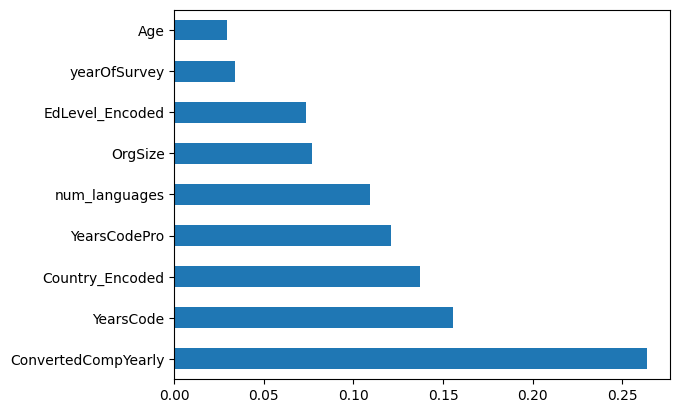

In [988]:
# Get feature importances from the model
decision_tree = tree_model.named_steps['decision_tree']
decision_tree.fit(X_train, y_train)
feature_importances = decision_tree.feature_importances_

# Pair feature importances with the feature names
feature_names = X_train.columns
feature_importances = pd.Series(feature_importances, index=feature_names)

# plot feature importances
feature_importances.sort_values(ascending=False).plot(kind='barh')

### Random Forest

1. relation between programming language and the framework
2. relation between job title and language

We build a model that predicts React, Angular, and jQuery (have worked with) from parameters such as Age, Country, and OrgSize
It returns React, Angular, and jQuery framework as a result
1. We can compare the actual data with the expected data
2. If we have enough datasets, we run model multiple time. It will give us x number of React, y number of Angular, and z number of jQuery.
3. We can compare x, y, and z
4. We can also find weight of predictor that influencxe our predicting result